# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [5]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


Answer: 400 entires. 

> ### Question 2.  Create a summary table.

In [13]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

Answer: GPA's max is 4.0 with a min of 2.26, while GRE's max is 800 with a min of 220, and with a range ~200 times the size of GPA's, under the same scale, GRE's variance would be predispositioned to be higher due to the size of its integers.

> ### Question 4.  Drop data points with missing data.

In [44]:
df=df.dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [45]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: My df.describe() is now returning zero NaN values! 

> ### Question 6.  Create boxplots for `gre` and `gpa`.

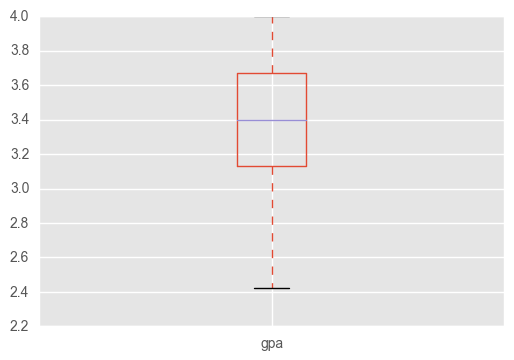

In [66]:
df.boxplot(column='gpa', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type = 'axes')

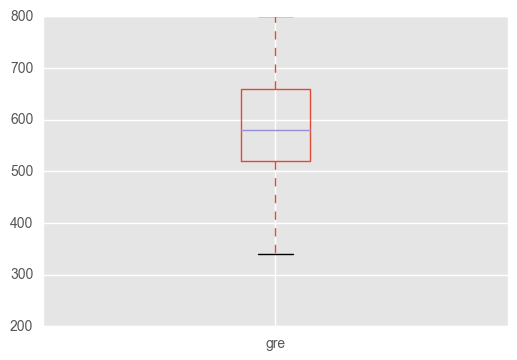

In [67]:
df.boxplot(column='gre', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type='axes')

> ### Question 7.  What do boxplots show?

Answer: Min, max, 25%, 50%, 75%, mean.

> ### Question 8.  Plot the distribution of each variable.

(array([  1.,   3.,  16.,  28.,  50.,  75.,  81.,  64.,  44.,  35.]),
 array([ 220.,  278.,  336.,  394.,  452.,  510.,  568.,  626.,  684.,
         742.,  800.]),
 <a list of 10 Patch objects>)

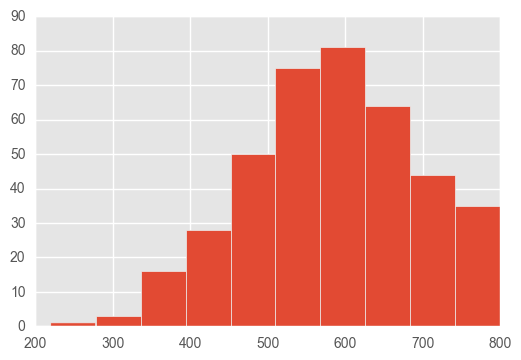

In [78]:
plt.hist(df['gre'])

(array([  3.,   4.,  16.,  32.,  42.,  57.,  76.,  65.,  39.,  63.]),
 array([ 2.26 ,  2.434,  2.608,  2.782,  2.956,  3.13 ,  3.304,  3.478,
         3.652,  3.826,  4.   ]),
 <a list of 10 Patch objects>)

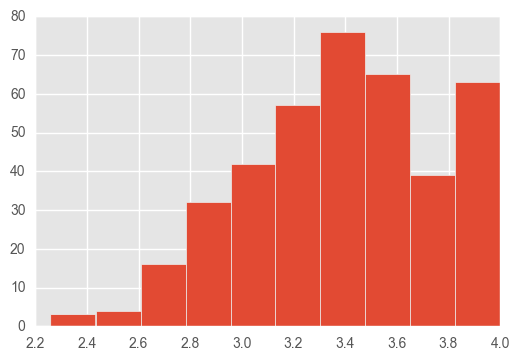

In [77]:
plt.hist(df['gpa'])

(array([ 271.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  126.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

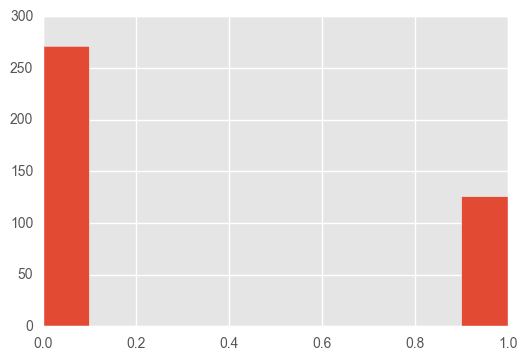

In [70]:
plt.hist(df['admit'])

(array([  61.,    0.,    0.,  148.,    0.,    0.,  121.,    0.,    0.,   67.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

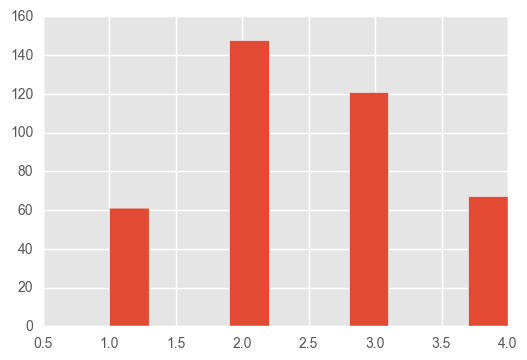

In [71]:
plt.hist(df['prestige'])

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [80]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

What we would need to do here is scale GRE and GPA to be within the same scale since their orders of magniturde off from one another. If we "normalize" the data, we'd be then able to accurately mean their distribution against one another. 

Answer:

> ### Question 10.  Create a correlation matrix for the dataset

In [81]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: GPA and GRE seem to have the highest correlation between two datapoints. .38 is closest to a 1.0, which is pretty good given how off the other data points are. However, if I wanted to find the variable that most closely correlates with admittance, then it appears GRE and admittance seem to be the most closely correlated. 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: We would like to explore, given a dataset from UCLA's graduate school admission from time period X - Y, what the correlation of admittance is for individuals who have previously attended undergraduate schools of high caliber, e.g. Ivy League and other top 30 institutions according to an unbiased source, the US News & World Report. 

> ### Question 13.  What is your hypothesis?

Answer: Based on the correlation matrix I have above, it doesn't appear that Prestige is the best indicator of admittance, but rather it seems like there's a negative correlation. That based on an individual's undergradate education, it doesn't appear to be at all a good indicator of whether they would be admitted. And given the data set, it appears that a high GRE score would be the closest indicator. 